In [1]:
import pandas as pd,os,numpy as np

path = os.path.abspath("./")

df = pd.read_csv(f"{path}/감정분석.csv")
df

,datetime,headline,label
0,2021.04.01,[글로벌포스트] 골드만삭스도 비트코인 투자상품 출시한다,1.0
1,2021.04.01,"비트코인, 페이팔·골드만에 환호…6만달러 넘고 또 최고가 쓸까",1.0
2,2021.04.01,"골드만삭스 ""비트코인 투자상품 내놓겠다""…6만달러 근접",1.0
3,2021.04.01,비트코인 '가즈아~' 7200만원 넘었다…역대 최고가 경신,1.0
4,2021.04.01,골드만삭스도 비트코인 투자상품 판다,1.0
...,...,...,...
1996,2022.04.01,[비트코인 지금] 유럽 자금세탁방지 규제 강화 소식에 '약세',0.0
1997,2022.04.04,[비트코인 지금] 90% 채굴 완료…희소성 높아지자 상승세,1.0
1998,2022.04.05,"[코인 시황] 비트코인 47.4K찍고 후퇴...""200일 이평선 돌파가 관건""",0.0
1999,2022.04.05,비트코인 4만6000달러·이더리움 3500달러 '보합세',1.0


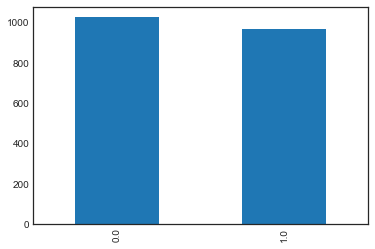

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

df['label'].value_counts().plot(kind='bar');

In [3]:
headline = df['headline']
label = df['label']

headline = headline.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "")

headline

C:\ProgramData\Anaconda3\envs\team_project\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0         글로벌포스트 골드만삭스도 비트코인 투자상품 출시한다
1       비트코인 페이팔골드만에 환호만달러 넘고 또 최고가 쓸까
2           골드만삭스 비트코인 투자상품 내놓겠다만달러 근접
3             비트코인 가즈아 만원 넘었다역대 최고가 경신
4                  골드만삭스도 비트코인 투자상품 판다
                     ...              
1996    비트코인 지금 유럽 자금세탁방지 규제 강화 소식에 약세
1997        비트코인 지금  채굴 완료희소성 높아지자 상승세
1998      코인 시황 비트코인 찍고 후퇴일 이평선 돌파가 관건
1999               비트코인 만달러이더리움 달러 보합세
2000     비트코인 지금  증시 훈풍채굴 난이도 높아지자 오름세
Name: headline, Length: 2001, dtype: object

In [4]:
# 불용어 사전
stopwords = [ '도','는','다','의','가','이','은','한','에','하','고','을','를','인',
             '듯','과','와','네','들','듯','지','임','게']

# 토큰화 및 불용어 제거
from konlpy.tag import Mecab
mecab = Mecab("C:/mecab/mecab-ko-dic")

headline = headline.apply(mecab.morphs) # 형태소추출
headline = headline.apply(lambda x: [item for item in x if item not in stopwords])

headline

0        [글로벌, 포스트, 골드만, 삭스, 비트코인, 투자, 상품, 출시, 한다]
1        [비트코인, 페이팔, 골드만, 환호, 만, 달러, 넘, 또, 최고, 쓸까]
2       [골드만, 삭스, 비트코인, 투자, 상품, 내놓, 겠, 다만, 달러, 근접]
3            [비트코인, 가즈, 아, 만, 원, 넘, 었, 역대, 최고, 경신]
4                      [골드만, 삭스, 비트코인, 투자, 상품, 판다]
                           ...                    
1996    [비트코인, 지금, 유럽, 자금, 세탁, 방지, 규제, 강화, 소식, 약세]
1997         [비트코인, 지금, 채굴, 완료, 희소성, 높, 아, 자, 상승세]
1998        [코인, 시황, 비트코인, 찍, 후퇴, 일, 평, 선, 돌파, 관건]
1999                 [비트코인, 만, 달러, 더리, 움, 달러, 보합세]
2000      [비트코인, 지금, 증시, 훈풍, 채굴, 난이, 높, 아, 자, 오름세]
Name: headline, Length: 2001, dtype: object

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
VOCAB_SIZE = 1000

# 토크나이저
tokenizer = Tokenizer()
tokenizer.fit_on_texts(headline)

tokenizer = Tokenizer(VOCAB_SIZE, oov_token="OOV")  # 한국어 단어 1000개 불러옴 
tokenizer.fit_on_texts(headline)
x = tokenizer.texts_to_sequences(headline)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



x

[[70, 108, 119, 125, 2, 24, 239, 97, 210],
 [2, 439, 119, 1, 3, 5, 64, 43, 32, 1],
 [119, 125, 2, 24, 239, 611, 377, 612, 5, 211],
 [2, 722, 72, 3, 4, 64, 60, 212, 32, 126],
 [119, 125, 2, 24, 239, 936],
 [258, 1, 3, 140, 35, 2, 101, 102, 141, 142, 203, 341],
 [278, 279, 2, 1, 526, 103, 53, 8, 1, 1, 88, 98],
 [6, 16, 2, 3, 4, 32, 1, 937],
 [2, 7, 3, 4, 14, 342, 153, 440, 192, 85, 938, 240],
 [2, 378, 11, 26, 23, 939, 527, 613],
 [20, 2, 3, 4, 14],
 [193, 24, 1, 166, 178, 72, 2, 94, 104, 154, 64, 343],
 [2, 167, 204, 344, 179, 29, 3, 5, 379],
 [2, 3, 4, 614, 64, 60, 12, 13, 32],
 [95, 615, 723, 26, 528, 2, 77, 81, 24, 280],
 [2, 7, 127, 3, 4, 14, 113, 724, 168, 1],
 [2, 3, 4, 380, 60, 78, 32, 43, 126],
 [2, 529, 24, 940, 1, 725],
 [2, 213, 19, 530, 56, 941, 531, 167, 116, 15],
 [180, 726, 22, 2, 31, 54, 727],
 [1, 1, 1, 2, 49, 1, 88, 728, 64, 60],
 [3, 4, 29, 381, 2, 241, 214, 120, 3, 4, 382],
 [89, 11, 26, 74, 32, 383, 2, 3, 4, 942, 15, 316],
 [2, 3, 4, 64, 60, 212, 32],
 [2, 3, 4, 64,

In [6]:
print("리뷰 최대 길이 : ", max(len(l) for l in x))
print("리뷰 평균 길이 : ", sum(map(len, x))/len(x))
x = pad_sequences(x, maxlen=10, padding='post', truncating='post')

리뷰 최대 길이 :  19
리뷰 평균 길이 :  9.35832083958021


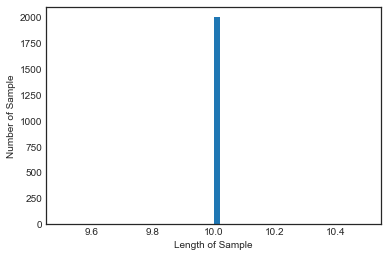

In [7]:
# 시각화
plt.hist([len(s) for s in x], bins=50)
plt.xlabel("Length of Sample")
plt.ylabel("Number of Sample")
plt.show()

In [8]:
max_len = 10

x = pad_sequences(x, maxlen=max_len, padding='post', truncating='post')
y = label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 10), (401, 10), (1600,), (401,))

In [9]:
model = Sequential()

model.add(Embedding(VOCAB_SIZE, 100))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2

In [16]:
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,GRU
from keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-8)  
lr=ReduceLROnPlateau(monitor= "val_acc", patience = 3, mode='max',factor = 0.1, min_lr=1e-11,verbose=False)
es = EarlyStopping(monitor ="val_acc", patience=10, mode='max',verbose=1,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])    

model.fit(x_train,y_train,batch_size=16,epochs=1000,validation_data=(x_test,y_test),callbacks=[lr,es], verbose=1)

y_pred = model.predict(x_test)
y_pred_int  = np.argmax(y_pred,axis=1)
print(y_pred[:10])
print(y_pred_int[:10])

print(
'Epoch 176/1000\n100/100 [==============================] - 8s 15ms/step - loss: 0.3207 - acc: 0.7064 - val_acc: 0.6961 - lr: 1.0000e-5\nacc는 : 0.7604')

Epoch 176/1000
100/100 [==============================] - 8s 15ms/step - loss: 0.3207 - acc: 0.7064 - val_acc: 0.6961 - lr: 1.0000e-5
acc는 : 0.7604


In [11]:
hist_dict = hist.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label="training loss")
plt.plot(val_loss, 'r:', label="validation loss")
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label="training acc")
plt.plot(val_acc, 'r:', label="validation loss")
plt.legend()
plt.grid()

NameError: name 'hist' is not defined